<b>Implement a KNN model to classify the animals in to categorie

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='darkgrid')

In [3]:
data = pd.read_csv(r'D:\Excelr Data Science assignment\KNN\Zoo.csv')

In [4]:
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [5]:
data.tail()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
100,wren,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2


<b>EDA

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [7]:
data.describe(include='all')

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
unique,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,frog,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,NaN,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,NaN,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,NaN,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000


In [8]:
data.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [9]:
data['animal name'].value_counts()

frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: animal name, Length: 100, dtype: int64

In [18]:
data['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

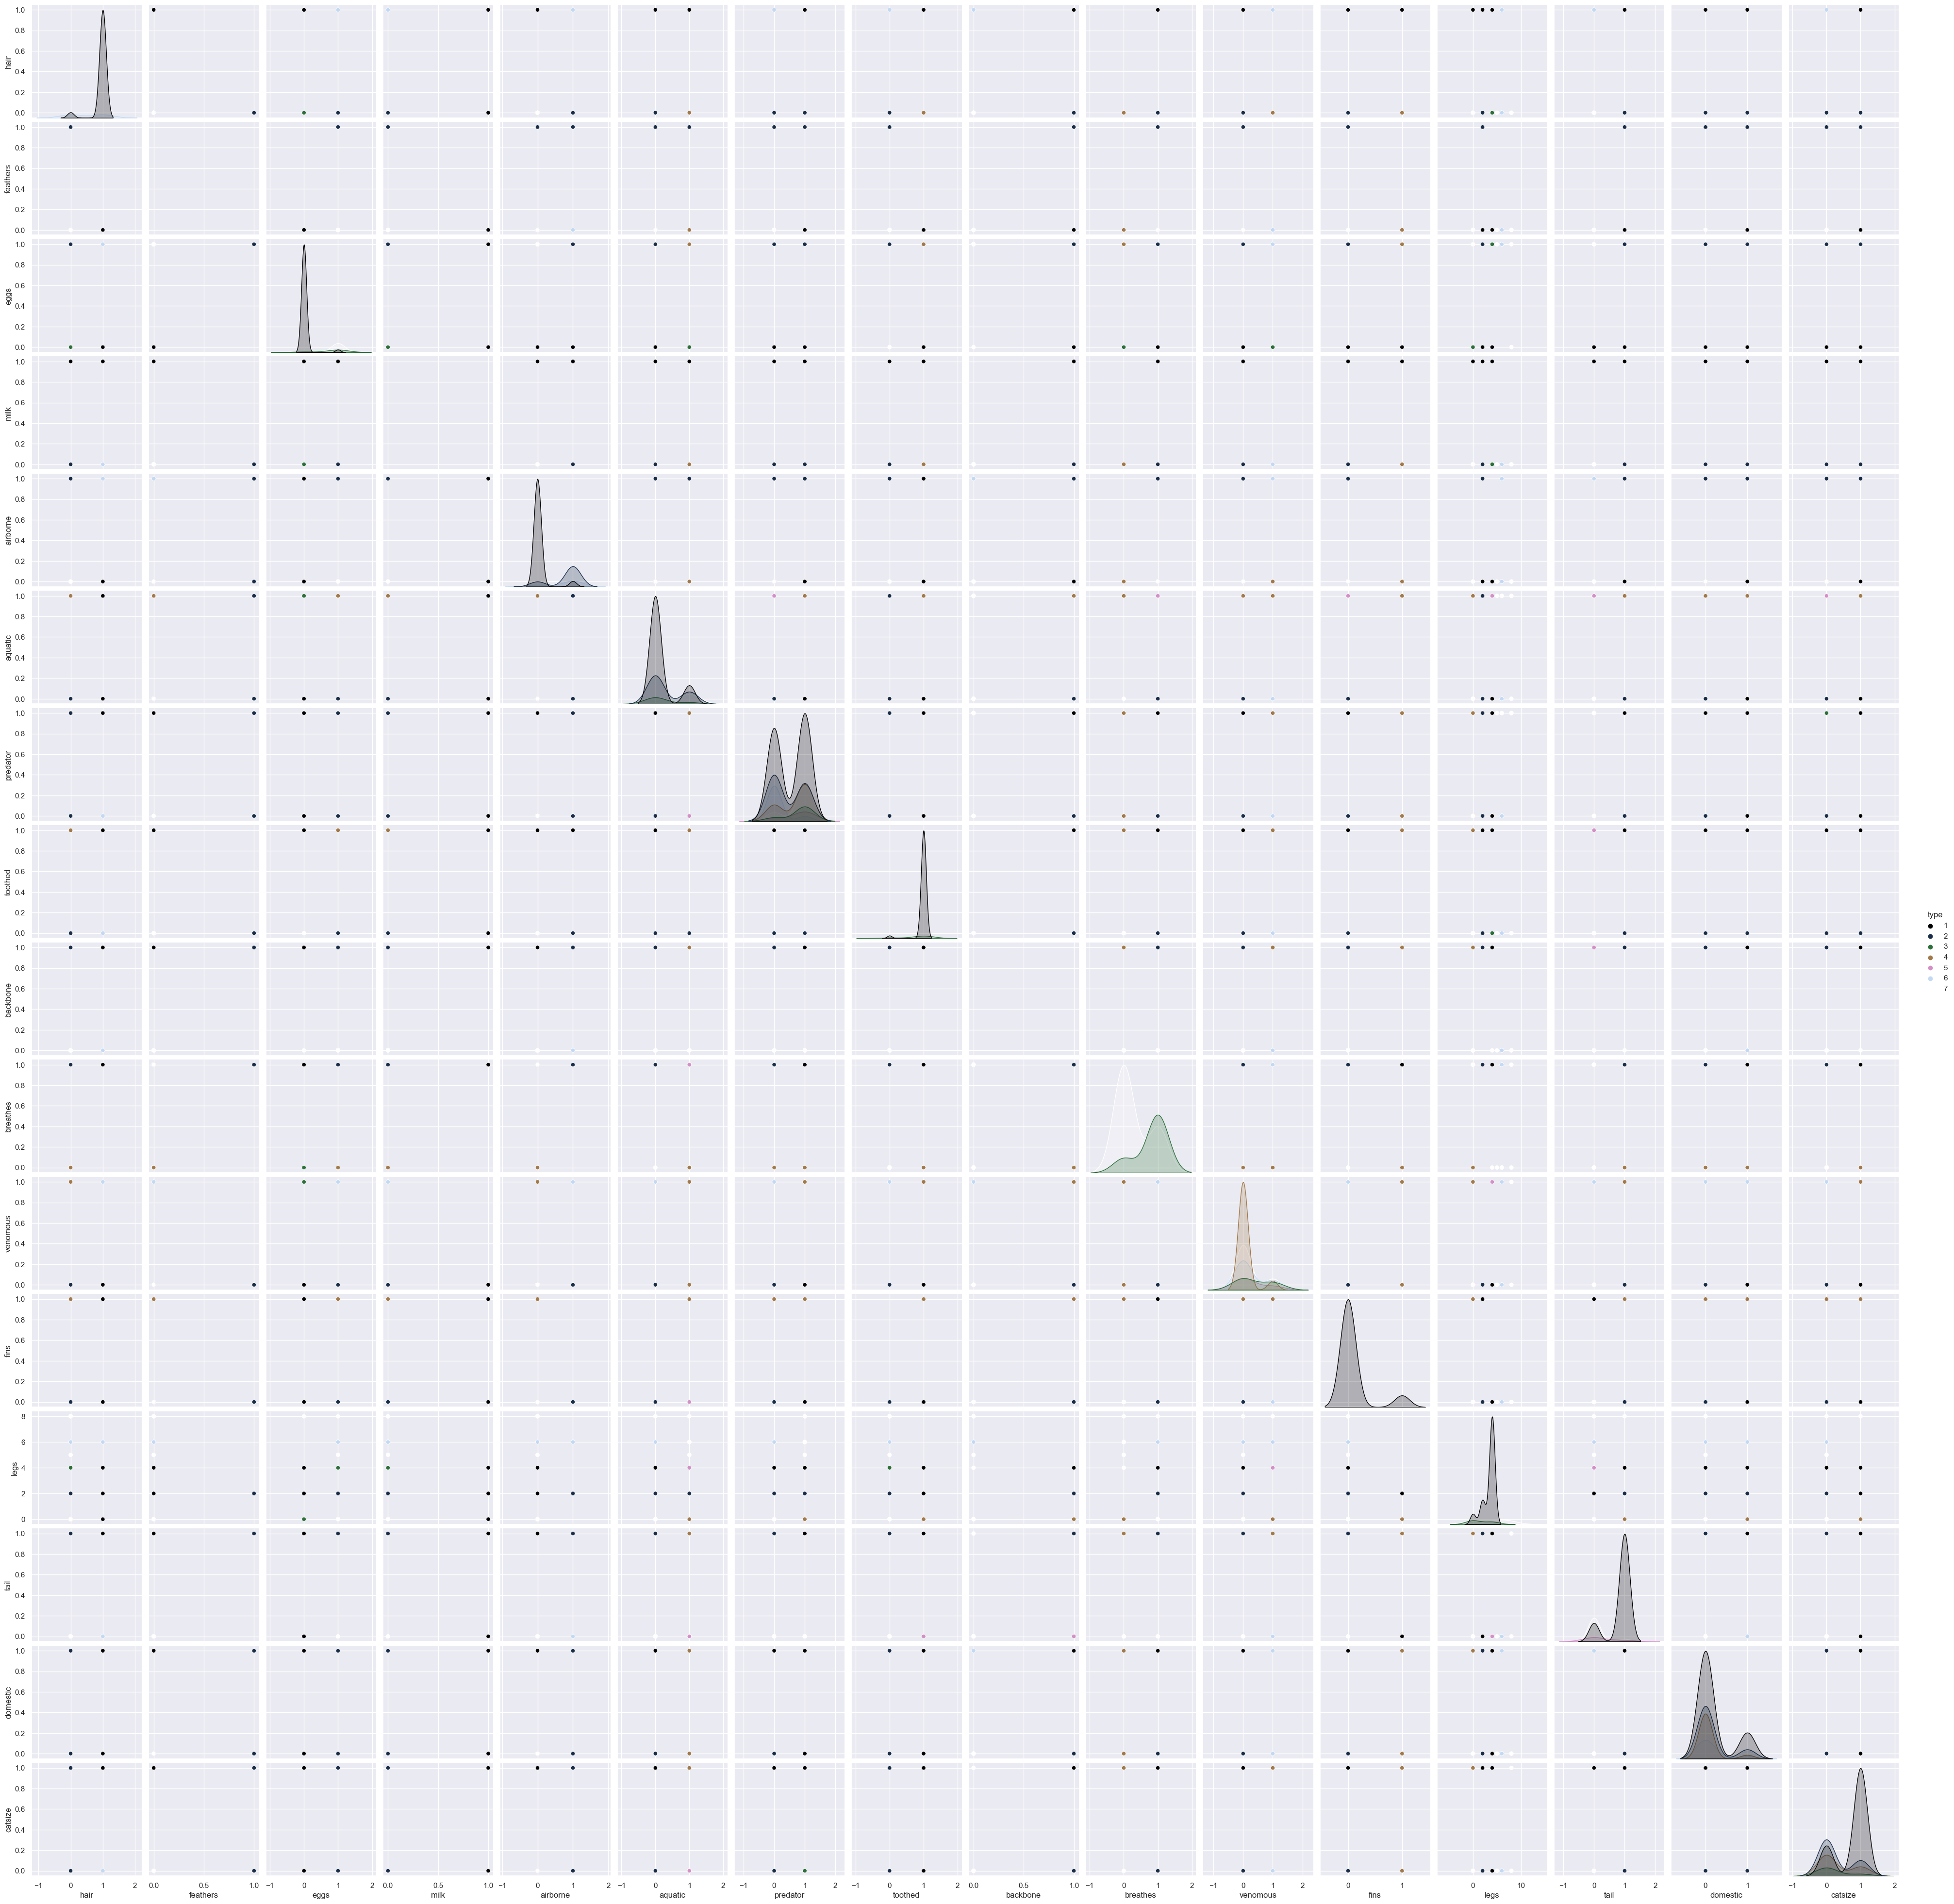

In [11]:
sns.pairplot(data,hue='type',palette='cubehelix')

C:\Users\CSC\AppData\Local\Temp\ipykernel_5208\1949062240.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


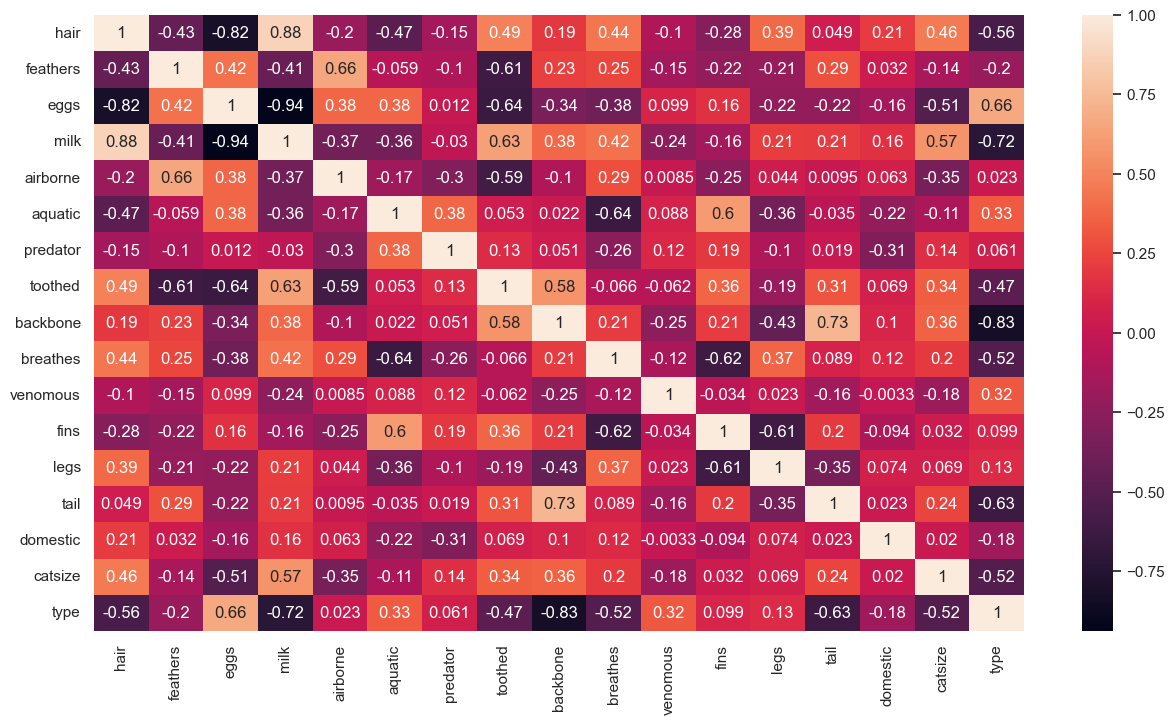

In [14]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

<b>X and Y

In [15]:
x = data.drop(['type'],axis=1)
y = data['type']

Text(0.5, 1.0, 'PiePlot of Type')

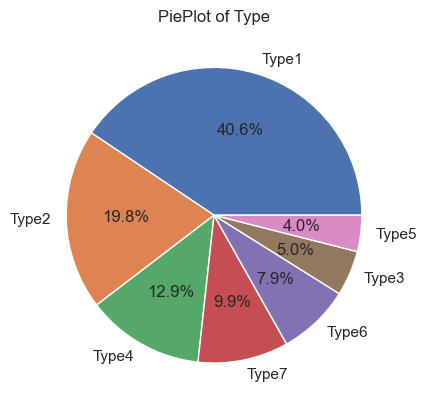

In [19]:
val_count = y.value_counts()
label = val_count.index
values = val_count.values
labels=['Type1', 'Type2', 'Type4', 'Type7', 'Type6', 'Type3','Type5']
#Piechart
plt.pie(values,labels=labels,autopct='%1.1f%%')
plt.title('PiePlot of Type')

<b>MODEL BUILDING

In [26]:
x1 = x.drop(['animal name'],axis=1)
x1

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x1,y,test_size=0.2,random_state=101)
model_1 = KNeighborsClassifier(n_neighbors=1)
model_1.fit(x_train,y_train)
y_pred = model_1.predict(x_test)
print("Confusion_Matrix: ",'\n',confusion_matrix(y_test,y_pred))
print('=======================================================================')
print("Classification_Report: ",'\n',classification_report(y_test,y_pred))

Confusion_Matrix:  
 [[6 0 0 0 0 0 0]
 [0 7 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 1 0 2]]
Classification_Report:  
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           5       0.50      1.00      0.67         1
           6       1.00      1.00      1.00         1
           7       1.00      0.67      0.80         3

    accuracy                           0.95        21
   macro avg       0.93      0.95      0.92        21
weighted avg       0.98      0.95      0.96        21



<b>Finding Optimum numbers of k

In [29]:
error = []
for k in range(1,51):
    knn_loop = KNeighborsClassifier(n_neighbors=k)
    knn_loop.fit(x_train,y_train)
    y_p = knn_loop.predict(x_test)
    error.append(np.mean(y_p!=y_test))
error

[0.047619047619047616,
 0.09523809523809523,
 0.047619047619047616,
 0.14285714285714285,
 0.14285714285714285,
 0.19047619047619047,
 0.23809523809523808,
 0.23809523809523808,
 0.23809523809523808,
 0.23809523809523808,
 0.23809523809523808,
 0.23809523809523808,
 0.23809523809523808,
 0.23809523809523808,
 0.23809523809523808,
 0.23809523809523808,
 0.23809523809523808,
 0.23809523809523808,
 0.2857142857142857,
 0.2857142857142857,
 0.2857142857142857,
 0.2857142857142857,
 0.2857142857142857,
 0.2857142857142857,
 0.2857142857142857,
 0.2857142857142857,
 0.2857142857142857,
 0.2857142857142857,
 0.2857142857142857,
 0.2857142857142857,
 0.2857142857142857,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.42857142857142855,
 0.5238095238095238,
 0.5238095238095238,
 0.6190476190476191,
 0.6190476190476191,
 0.6190476190476191,
 0.6190476190476191,
 0.6190476190476191,
 0.6190476190476191,
 0.6190476190476191,
 0.6190476190476191,
 0.6190476190

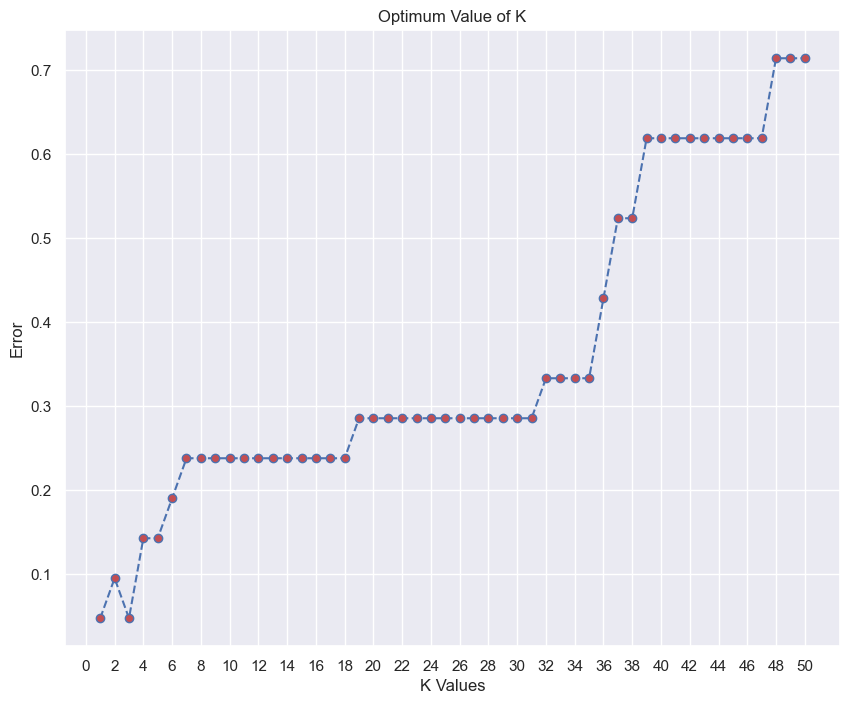

In [31]:
plt.figure(figsize=(10,8))
plt.plot(range(1,51),error,marker='o',markerfacecolor='r',color='b',linestyle='--')
plt.xticks(np.linspace(0,50,26))
plt.xlabel('K Values')
plt.ylabel('Error')
plt.title('Optimum Value of K')
plt.show()

<b>Error is Constant between 7 to 18 and in between 19 to 31. Let's take k=7

In [34]:
model_2 = KNeighborsClassifier(n_neighbors=7)
model_2.fit(x_train,y_train)
y_pred_2 = model_2.predict(x_test)
print("Confusion_Matrix: ",'\n',confusion_matrix(y_test,y_pred_2))
print('=======================================================================')
print("Classification_Report: ",'\n',classification_report(y_test,y_pred_2))

Confusion_Matrix:  
 [[6 0 0 0 0 0 0]
 [0 7 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [0 0 0 2 0 0 0]
 [1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 1 2 0]]
Classification_Report:  
               precision    recall  f1-score   support

           1       0.75      1.00      0.86         6
           2       1.00      1.00      1.00         7
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         2
           5       0.00      0.00      0.00         1
           6       0.33      1.00      0.50         1
           7       0.00      0.00      0.00         3

    accuracy                           0.76        21
   macro avg       0.44      0.57      0.48        21
weighted avg       0.66      0.76      0.70        21



D:\Anaconda\Installation\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Installation\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Installation\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<b>Model Performance is decreasing

<b>KFold Cross Validation

In [39]:
from sklearn.model_selection import KFold,cross_val_score
kf = KFold(n_splits=5,shuffle=True,random_state=201)
kf_mod = KNeighborsClassifier(n_neighbors=1)
result = cross_val_score(kf_mod,x1,y,cv=kf)
print(np.mean(result))

0.9523809523809523


<b>Conclusion:<br>
    
<b>Model with K=1 with accuray of 95% is been deployed